### Fetal Health Classifier for CTG Results 

In [1]:
library(repr)
library(tidyr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
install.packages("kknn")
library(kknn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ dplyr   1.1.1
✔ tibble  3.2.1     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ rec

### Introduction

Clinical Cardiotocography(CTG) is a common assessment method of fetal wellbeing during pregnancy through identifying problems such as hypoxia and distress(Ali Kadhim, N. J., & Kadhim Abed, J.,2020). It classfies fetal health into three groups: normal, suspect and Pathological. 

Previous studies by Ayres‐de‐Campos, D.et al. has proven SisPorto, a program used to analyze CTG to be promising at predicting fetal health as its predictions highly matches those made by experts(2000). There has been attempts to improve the use of CTG. In 2020, Ali & Kadhim developed a classifier using firefly alogorith and naive bayesian classfier with achieved accuracy 86.55% for CTG results. 

For this project, we are interested in replicating the idea of Ali & Kadhim, but with K-nearest-neighbor classification. We obtained a dataset of CTG records from Ayres‐de‐Campos et al.'s study,which was organized and published on Kaggle(Larxel, 2020). We choose to use all column as predictors except for ones involved in histograms, which we are uncertain of what they refer to. 

We are aiming to find the best K and building a classifier with KNN model. After analyze our results, we hope to come up with ideas to improve future CTG classifiers. 



## Methods(to be filled)

describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.

So We need to describe what we did from Obtaining the Data all the way to Visualizaion and Analysis in whole written English paragraphs in addition to embedding them into the codes.(Dominique）

### Obtain the Data

In [2]:
fetal_health_data <- read_csv("https://raw.githubusercontent.com/wonha0620/dsci_100_proj/main/fetal_health.csv")
head(fetal_health_data)

Rows: 2126 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): baseline value, accelerations, fetal_movement, uterine_contraction...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,⋯,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
120,0.000,0,0.000,0.000,0,0.000,73,0.5,43,⋯,62,126,2,0,120,137,121,73,1,2
132,0.006,0,0.006,0.003,0,0.000,17,2.1,0,⋯,68,198,6,1,141,136,140,12,0,1
133,0.003,0,0.008,0.003,0,0.000,16,2.1,0,⋯,68,198,5,1,141,135,138,13,0,1
134,0.003,0,0.008,0.003,0,0.000,16,2.4,0,⋯,53,170,11,0,137,134,137,13,1,1
132,0.007,0,0.008,0.000,0,0.000,16,2.4,0,⋯,53,170,9,0,137,136,138,11,1,1
134,0.001,0,0.010,0.009,0,0.002,26,5.9,0,⋯,50,200,5,3,76,107,107,170,0,3


The reason why we are not going to use the histogram columns is because it has missing information on what the histograms are calculating from the original data set. Therefore, we will be excluding it from our predictors. 

### Wrangling the Data

In [3]:
health_data_clean <- fetal_health_data |>
    mutate(fetal_health = as_factor(fetal_health))
colnames(health_data_clean) <- gsub(" ", "_", colnames(health_data_clean))
head(health_data_clean)

baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,⋯,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
120,0.000,0,0.000,0.000,0,0.000,73,0.5,43,⋯,62,126,2,0,120,137,121,73,1,2
132,0.006,0,0.006,0.003,0,0.000,17,2.1,0,⋯,68,198,6,1,141,136,140,12,0,1
133,0.003,0,0.008,0.003,0,0.000,16,2.1,0,⋯,68,198,5,1,141,135,138,13,0,1
134,0.003,0,0.008,0.003,0,0.000,16,2.4,0,⋯,53,170,11,0,137,134,137,13,1,1
132,0.007,0,0.008,0.000,0,0.000,16,2.4,0,⋯,53,170,9,0,137,136,138,11,1,1
134,0.001,0,0.010,0.009,0,0.002,26,5.9,0,⋯,50,200,5,3,76,107,107,170,0,3


### Preliminary exploratory data analysis

In [4]:
#To determine which predictors we choose:
mean_table <- health_data_clean |>
    group_by(fetal_health) |>
    summarize_all(mean)
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)
mean_table

fetal_health,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,131.9819,0.0039921450,0.007963142,0.004780665,0.0019413897,6.042296e-07,5.135952e-05,42.46586,1.4306344,5.044713,8.705498,73.40000,91.08580,164.4858,4.163142,0.3353474,138.2586,135.1021,138.4598,17.479758,0.34199396
2,141.6847,0.0002745763,0.008332203,0.002389831,0.0005355932,0.000000e+00,9.491525e-05,61.90169,0.6389831,29.030508,8.026102,49.15932,113.29492,162.4542,3.311864,0.2440678,146.5559,144.7593,147.0712,7.213559,0.43389831
3,131.6875,0.0003920455,0.025676136,0.003784091,0.0036704545,3.409091e-05,1.272727e-03,64.53977,1.5755682,22.846591,3.588636,78.34659,83.98295,162.3295,4.443182,0.3465909,114.6080,112.9773,119.5625,50.732955,-0.07386364


We compared the means calculated within each variable and choose the variable as a predictor if the means are obviously different from each other. A different mean represents that category's unique trait and is useful to classify new observations accordingly. In the end we choose all the variables from baseline_value to mean_value_of_long_term_variability. Also, as we are uncertain of what columns regarding histograms meant, we choose not to incorporate them into our model.  

In [5]:
#So we keep the predictor columns:
health_data_chosen<-health_data_clean|>select(baseline_value:mean_value_of_long_term_variability,fetal_health)
head(health_data_chosen)

baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
120,0.000,0,0.000,0.000,0,0.000,73,0.5,43,2.4,2
132,0.006,0,0.006,0.003,0,0.000,17,2.1,0,10.4,1
133,0.003,0,0.008,0.003,0,0.000,16,2.1,0,13.4,1
134,0.003,0,0.008,0.003,0,0.000,16,2.4,0,23.0,1
132,0.007,0,0.008,0.000,0,0.000,16,2.4,0,19.9,1
134,0.001,0,0.010,0.009,0,0.002,26,5.9,0,0.0,3


In [6]:
#count each category in fetal_health to see if the proportion needs to be adjusted
count_fetal_health<-health_data_chosen|>group_by(fetal_health)|>summarise(count=n())
count_fetal_health

fetal_health,count
<fct>,<int>
1,1655
2,295
3,176


The differences between each class is significant (with class 1 occupying 78% of the total data). If we we choose to stick with the original number of data, category 2 and 3 would be of really small significant, potentially resulting in less accurate predictions. To address this problem, we randomly deleted some observations in class 1 and class 2. Making each class having 176 observations, so they are equal in proportion . 

In [7]:
#To randomly delete some data, we use set.seed and sample_n
set.seed(2023)
sampled_health_data1<-health_data_chosen|>filter(fetal_health == 1)|>sample_n(176)
sampled_health_data2<-health_data_chosen|>filter(fetal_health == 2)|>sample_n(176)

In [8]:
#Combine the selected data in category 1 and 2 with 3.
final_sampled_data<-health_data_chosen |>
    filter(fetal_health == 3) |>
    bind_rows(sampled_health_data1,sampled_health_data2)
head(final_sampled_data)

baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
134,0.001,0.00,0.010,0.009,0,0.002,26,5.9,0,0.0,3
134,0.001,0.00,0.013,0.008,0,0.003,29,6.3,0,0.0,3
122,0.000,0.00,0.000,0.000,0,0.000,83,0.5,6,15.6,3
122,0.000,0.00,0.002,0.000,0,0.000,84,0.5,5,13.6,3
122,0.000,0.00,0.003,0.000,0,0.000,86,0.3,6,10.6,3
129,0.000,0.34,0.004,0.002,0,0.003,30,2.1,0,8.5,3


We could double check if we get the wanted quantity of the observations in final_sampled_data

In [9]:
count_final_sampled_data<-final_sampled_data|>group_by(fetal_health)|>summarise(count=n())
count_final_sampled_data

fetal_health,count
<fct>,<int>
1,176
2,176
3,176


### Developing the Model and Visualization of the dataset 

In [10]:
#First we split the whole dataset into training and testing datasets.
set.seed(2023)
health_split <- initial_split(final_sampled_data, prop=0.75, strata=fetal_health)
health_training <- training(health_split)
health_testing <- testing(health_split)

#### Choosing the best K

In [11]:
set.seed(2023)
#Then, we split the training data into multiple folds of training and validation by vfold_cv. We choose to 
#split into 5 folds as it's commonly used.
health_vfold<-vfold_cv(health_training,v=5, strata = fetal_health)

#Then we need to write our recipe based on the training data
health_recipe<-recipe(fetal_health~.,data = health_training)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())
#We use knn classification as we chose,  and tune() to test the different k.
health_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
    set_engine("kknn")|>
    set_mode("classification")

In [12]:
#We need a tibble to include the k values we want to try and fit. We choose from 1 to 50 and by 3 because 
#after trying from 1 to 100 and going by 5, we found the peak in the graph to be at the start, so narrowing the
#span of k could result in a better visualization.
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 3))
               
#Then we use tune_grid to fit the model with different k.
health_results <- workflow() |>
    add_recipe(health_recipe) |>
    add_model(health_spec_tune) |>
    tune_grid(resamples = health_vfold, grid = k_vals) |>
    collect_metrics()

#Then we calculate the accuracies from the results
accuracies <- health_results |>
    filter(.metric == "accuracy")
head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.8665717,5,0.012400346,Preprocessor1_Model01
4,accuracy,multiclass,0.8683761,5,0.012513830,Preprocessor1_Model02
7,accuracy,multiclass,0.8432099,5,0.009471000,Preprocessor1_Model03
10,accuracy,multiclass,0.8459639,5,0.015594948,Preprocessor1_Model04
13,accuracy,multiclass,0.8281102,5,0.009952272,Preprocessor1_Model05
16,accuracy,multiclass,0.8206078,5,0.008579131,Preprocessor1_Model06


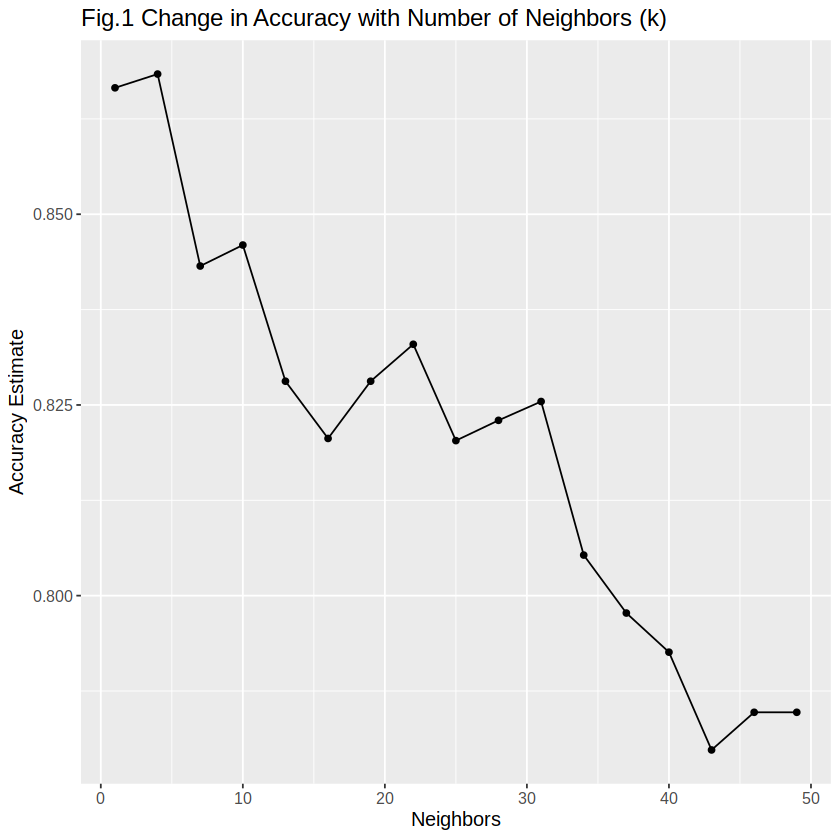

In [19]:
#then we plot the k vs accuracy and choose the k with highest accuracy
options(rept.plot.width = 4, rept.plot.height = 4)
acc_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  ggtitle("Fig.1 Change in Accuracy with Number of Neighbors (k)")+
  theme(text = element_text(size = 12))

acc_vs_k

So at K = 4, we get the highest accuracy. 

#### Prediction using the chosen K

In [14]:
#Final model with K = 4
health_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
    set_engine("kknn") |>
    set_mode("classification")

#Reuse recipe and fit
health_fit_final <- workflow() |>
    add_recipe(health_recipe) |>
    add_model(health_spec_final) |>
    fit(health_training)

health_predictions <- predict(health_fit_final, health_testing) |>
    bind_cols(health_testing)

#Check accuracy of our model
health_predictions_accuracy <- health_predictions |>
    metrics(truth = fetal_health, estimate = .pred_class)
health_predictions_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8030303
kap,multiclass,0.7045455


Our model seems to be able to predict accurately 80% of the time. We do deeper analysis by creating bar graphs

#### Visualization and Analysis

`summarise()` has grouped output by 'correct'. You can override using the
`.groups` argument.


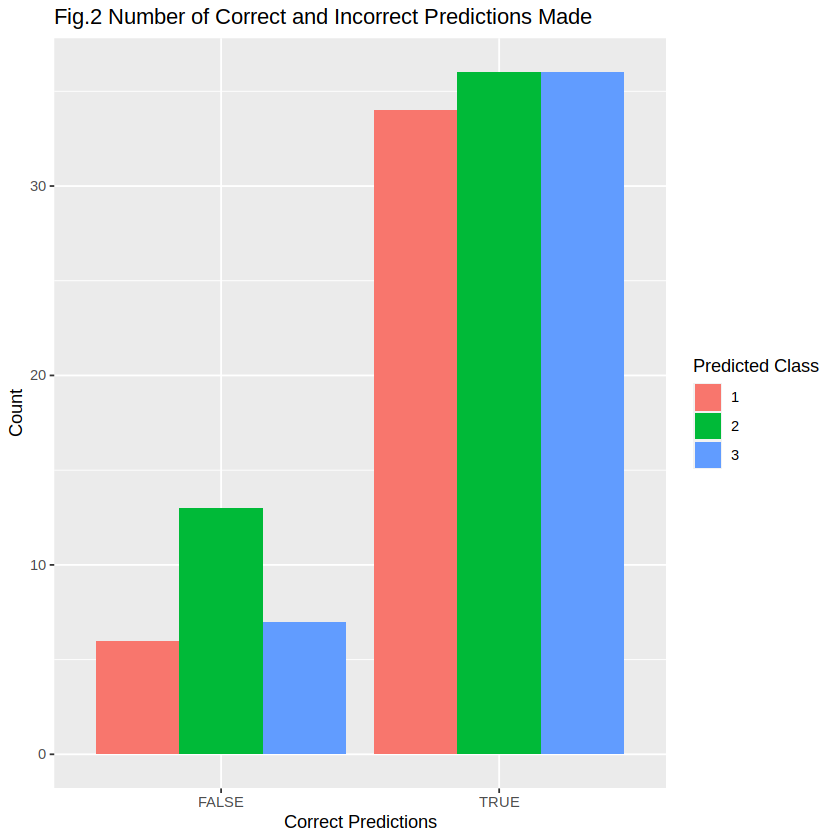

In [20]:
#We create the dataframe with predicted results, count the ones that are correctly predicted
health_predictions_clean <- health_predictions |>
    select(.pred_class, fetal_health) |>
    mutate(correct = (.pred_class == fetal_health)) |>
    group_by(correct, .pred_class) |>
    summarize(count = n())
#We use bar graph to visualize the correct and incorrect predictions.
health_predictions_plot <- ggplot(health_predictions_clean, aes(x = correct, y = count, fill = .pred_class)) +
    geom_bar(stat = "identity", position = "dodge")+labs(x="Correct Predictions",y="Count",fill="Predicted Class")+
    ggtitle("Fig.2 Number of Correct and Incorrect Predictions Made")

health_predictions_plot

### References

Ali Kadhim, N. J., & Kadhim Abed, J. (2020). Enhancing the prediction accuracy for cardiotocography (CTG) using firefly algorithm and naive bayesian classifier. IOP Conference Series. Materials Science and Engineering, 745(1), 12101. https://doi.org/10.1088/1757-899X/745/1/012101

Ayres‐de‐Campos, D., Bernardes, J., Garrido, A., Marques‐de‐Sá, J., & Pereira‐Leite, L. (2000). Sisporto 2.0: A program for automated analysis of cardiotocograms. The Journal of Maternal-Fetal Medicine, 9(5), 311-318. https://doi.org/10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9

Larxel, L. (2020, October 12). Fetal Health Classification. Kaggle. https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification 